In [1]:
##############################################################################
# Handle imports
##############################################################################
import traceback
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
##############################################################################
# Generate Loss Curve
##############################################################################

def generate_loss_curve(title: str, logging_dir: str):
    """
    Plots the loss curve for the logging history in the given directory.

    Args:
        title: Title of the loss curve to be plotted.
        logging_dir: Directory that contains the training history.
    """
    
    plt.figure(figsize=(10, 6))

    log_history = glob.glob(logging_dir)[0]
    
    df = pd.read_json(log_history)
    
    train_logs = df.dropna(subset=['loss'])
    
    eval_logs = df.dropna(subset=['eval_loss'])
    
    if not train_logs.empty:
        
        plt.plot(train_logs['step'], train_logs['loss'], label='Training Loss', marker='o')
        
    if not eval_logs.empty:
        
        plt.plot(eval_logs['step'], eval_logs['eval_loss'], label='Validation Loss', marker='s')
    
    plt.title(title)
    
    plt.xlabel('Step')
    
    plt.ylabel('Loss')
    
    plt.legend()
    
    plt.grid(True)
    
    plt.show()


    



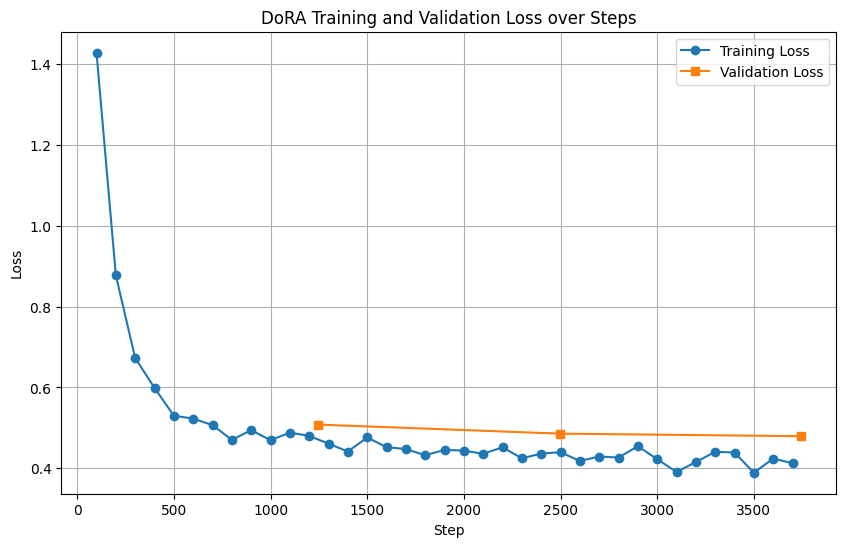

In [3]:
##############################################################################
# Plot Loss Curve for DoRA
##############################################################################
generate_loss_curve('DoRA Training and Validation Loss over Steps', 
                   'models/dora/ibm-granite_granite-4.0-h-tiny/evals/*.txt')

### Interpretations
- The training loss shows a normal downward trending, elbow shaped curve.

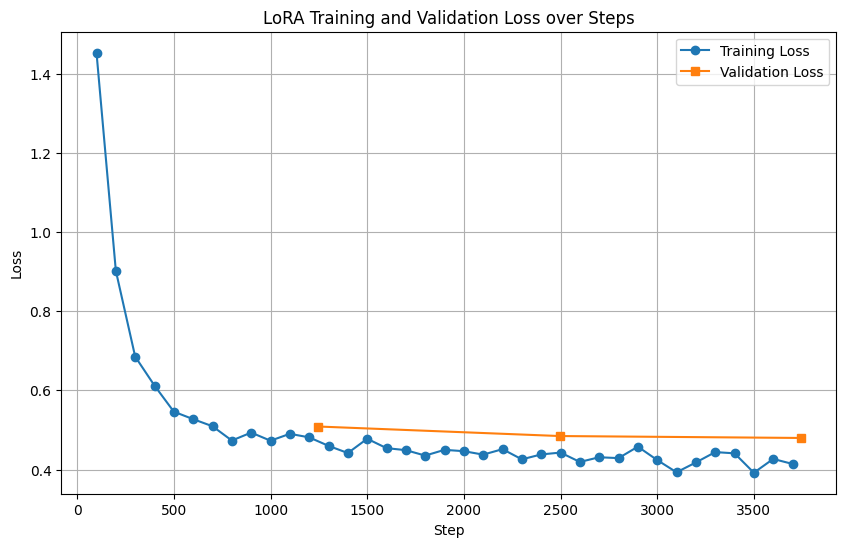

In [5]:
##############################################################################
# Plot Loss Curve for LoRA
##############################################################################
generate_loss_curve('LoRA Training and Validation Loss over Steps', 
                   'models/lora/ibm-granite_granite-4.0-h-tiny/evals/finetune_202511301518.txt')